In [3]:

import pandas as pd
import seaborn as sns
df = pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


In [4]:
#SI RICHIEDE DI VERIFICARE LE DIMENSIONI DEL DATASET E I RELATIVI METADATI
df.shape

(429435, 67)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
#TASK2
'''si richiede per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente ;
si chiede di non considerare eventuali locazioni che nel dataset non appartengano ad alcun continente'''
df.continent.unique()
continent_no_null = df.dropna(subset = ['continent'])
casi_totali_per_continente = continent_no_null.groupby('continent')['total_cases'].max()
casi_totali_per_continente
#AVENDO VISTO CHE LA COLONNA DEI CASI TOTALI è INCREMENTALE HO USATO LA FUNZIONE .MAX() PER PRENDERE IL VALORE  PIU ALTO PER CONTINENTE

continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64

In [12]:
#TASK 3 
'''• Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, 
ne confronti i seguenti relativi descrittori statistici: 
valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);'''
#FILTRO CONTINENTI
continente_europa_filtro = df['continent'] == 'Europe'
continente_europa = df.loc[continente_europa_filtro]
continente_europa
continente_africa_filtro = df['continent'] == 'Africa'
continente_africa = df.loc[continente_africa_filtro]
continente_africa
#CALCOLO IL VALORE MAX PER LOCALITA' 
max_europa_filtro = df['location'] == 'Europe'
max_europa = df.loc[max_europa_filtro].total_cases.max()
africa_europa_filtro = df['location'] == 'Africa'
max_africa = df.loc[africa_europa_filtro].total_cases.max()
#CALCOLO LA MEDIA  PER LOCALITA'
casi_per_localita_europa = continente_europa.groupby('location')['total_cases'].max().mean()
casi_per_localita_africa = continente_africa.groupby('location')['total_cases'].max().mean()
#CASI TOTALI CALCOLO
casi_tot_mondo = df.total_cases.max()
#CALCOLO PERCENTUALE CASI NEL MONDO PER CONTINENTE
percentuale_europa = (max_europa/casi_tot_mondo)*100
percentuale_europa
percentuale_africa = (max_africa/casi_tot_mondo)*100
percentuale_africa
#RISULTATI
print('Europa, valore massimo:', max_europa, ',media:', casi_per_localita_europa, ',percentuale globale casi totali:', percentuale_europa ,'%')
print('Africa, valore massimo:', max_africa, ',media:', casi_per_localita_africa, ',percentuale globale casi totali:', percentuale_africa ,'%')

Europa, valore massimo: 252916868.0 ,media: 4959154.274509804 ,percentuale globale casi totali: 32.59797603682178 %
Africa, valore massimo: 13145380.0 ,media: 230623.50877192983 ,percentuale globale casi totali: 1.694283127983841 %


In [3]:
#TASK4
'''Mostrare i dati relativi all italia nel 2022, e mostrare con un grafico adeguato l evoluzione dei casi totali rispetto
alla data.Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data(filtrare i dati se necessario).
Mostrare infine un grafico che mostra l andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono 
similarità con l andamento del numero dei casi totali'''
df.location.unique()
#df['date'] = pd.to_datetime(df['date'])
dati_italia_filtro = df.location == 'Italy'
dati_italia_anno = df.date.str.contains('2022')
df.loc[dati_italia_anno]
dati_italia = df.loc[dati_italia_filtro & dati_italia_anno]
dati_italia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.00,136530.0,0.0,140.86,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.29,137513.0,983.0,140.43,...,27.8,NaN,3.18,83.51,0.89,59037472,168226.3,12.99,8.06,2849.48
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.29,137513.0,0.0,140.43,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.29,137513.0,0.0,140.43,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.29,137513.0,0.0,140.43,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.14,184168.0,0.0,114.00,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.14,184168.0,0.0,114.00,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.14,184168.0,0.0,114.00,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.14,184168.0,0.0,114.00,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

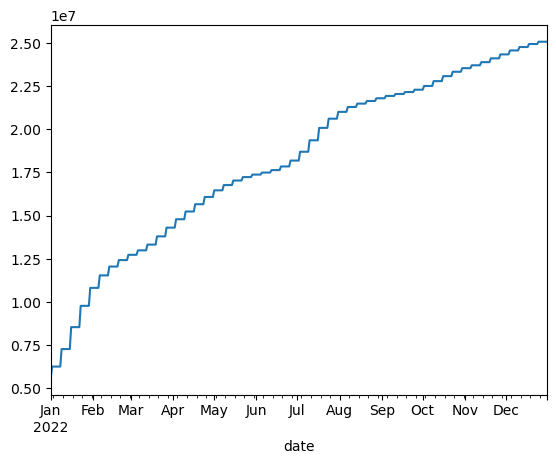

In [5]:
#EVOLUZIONE CASI TOTALI RISPETTO ALLA DATA
#dati_italia['date'] = pd.to_datetime(dati_italia['date'])
#dati_italia = dati_italia.set_index('date')
dati_italia.total_cases.plot()

<Axes: xlabel='date'>

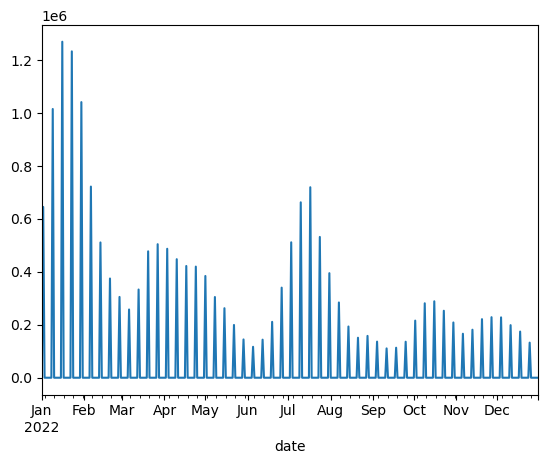

In [6]:
#NUOVI CASI TOTALI RISPETTO ALLA DATA
dati_italia.new_cases.plot()

<Axes: xlabel='date'>

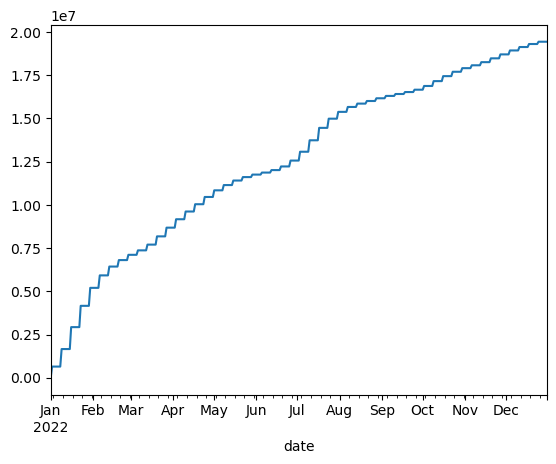

In [13]:
#GRAFICO SOMMA CUMULATIVA NUOVI CASI 2022
nuovi_casi_cumsum = dati_italia[['new_cases']].cumsum()
nuovi_casi_cumsum
nuovi_casi_cumsum.new_cases.plot()
#SI, I DUE GRAFICI SONO PRESSOCHE SIMILI

In [73]:
#TASK 4
'''• Riguardo le nazioni di Italia, Germania e Francia, 
mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva 
(Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;'''

filtro_paesi_anno = (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30') & ((df['location'] == 'Italy') | (df['location'] == 'France') | (df['location'] == 'Germany'))
paesi_anno_raggruppati = df.loc[filtro_paesi_anno]
paesi_anno_raggruppati

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.14,146744.0,867.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,89536.72,6.19,6.24,1385.45
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN


<Axes: xlabel='location', ylabel='icu_patients'>

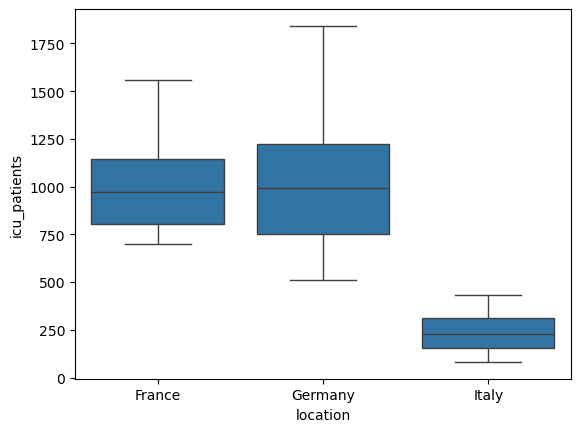

In [74]:
#GRAFICO PAZIENTI IN TERAPIA INTENSIVA PER NAZIONE
sns.boxplot(data= paesi_anno_raggruppati,  x='location' , y='icu_patients' )

#LA GERMANIA è LA NAZIONE CON PIU PAZIENTI IN TERAPIA INTENSIVA, L ITALIA INVECE HA IL MINOR NUMERO DI PAZIENTI IN TERAPIA INTENSIVA.

In [59]:
#5 TASK
'''• Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, 
mostrare la somma dei pazienti ospitalizzati per ognuna 
— se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.'''
filtro_nazioni_e_data = (df['date'].str.contains('2023')) & ((df['location'] == 'Italy') | (df['location'] == 'France') | (df['location'] == 'Germany')| (df['location'] == 'Spain'))
nazioni2023 = df.loc[filtro_nazioni_e_data]
nazioni2023_data_ordinata = nazioni2023.sort_values(by = 'date', ascending = True)
somma_nazioni = nazioni2023_data_ordinata.groupby('location')['hosp_patients'].sum()
somma_nazioni
#DOPO ALCUNE ANALISI FATTE SUI DATI NULLI, AVENDO VISTO CHE SONO PRESENTI IN GRANDE QUANTITA, 
#SUGGERISCO DI NON SOSTITUIRLI CON DEI VALORI CHE POTREBBERO ALTERARE L ANALISI, 
#AL MASSIMO DI DROPPARLI DAL DATASET.

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In [152]:
germania_hosp_patients_analisi = df[(df['location'] == 'Germany') & (df['date'].str.contains('2023'))][['hosp_patients']].isna().sum()
germania_hosp_patients_analisi

hosp_patients    365
dtype: int64